In [3]:
f = open("c:/data/text/trumph.txt", "r")
lines = f.readlines()
f.close()
print(lines[0][:500])

 Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans and people of the world, thank you. We, the citizens of America are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges. We will confront hardships, but we will get the job done. Every four years we gather on these 


In [4]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
# , 숫자 특수문자 제거
tokenizer = RegexpTokenizer('[\w]+')
#불용어 사전
stop_words = stopwords.words('english')
#모든 단어를 소문자로 변환
words = lines[0].lower()
#print(words)
#단어 단위로 토큰화
tokens = tokenizer.tokenize(words)
#불용어 제거
stopped_tokens = [i for i in list(tokens) if not i in stop_words]
# 사이즈가 1인 단어들 제거
stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

In [5]:
import pandas as pd
#연설문에 인용된 단어들을 빈도순으로 내림차순 정렬
pd.Series(stopped_tokens2).value_counts().head(10)

america     20
american    11
people      10
country      9
one          8
nation       7
every        7
world        6
never        6
new          6
dtype: int64

Counter({'america': 20, 'american': 11, 'people': 10, 'country': 9, 'one': 8, 'every': 7, 'nation': 7, 'world': 6, 'great': 6, 'back': 6, 'never': 6, 'new': 6, 'president': 5, 'many': 5, 'today': 5, 'protected': 5, 'across': 5, 'right': 5, 'dreams': 5, 'god': 5, 'make': 5, 'americans': 4, 'thank': 4, 'citizens': 4, 'together': 4, 'power': 4, 'first': 4, 'wealth': 4, 'everyone': 4, 'day': 4, 'heart': 4, 'bring': 4, 'obama': 3, 'government': 3, 'jobs': 3, 'left': 3, 'factories': 3, 'families': 3, 'united': 3, 'whether': 3, 'millions': 3, 'foreign': 3, 'countries': 3, 'nations': 3, 'borders': 3, 'must': 3, 'bless': 3, 'national': 2, 'years': 2, 'face': 2, 'get': 2, 'done': 2, 'transferring': 2, 'another': 2, 'washington': 2, 'long': 2, 'share': 2, 'politicians': 2, 'victories': 2, 'triumphs': 2, 'capital': 2, 'land': 2, 'moment': 2, 'states': 2, 'truly': 2, 'forgotten': 2, 'men': 2, 'women': 2, 'longer': 2, 'movement': 2, 'exists': 2, 'children': 2, 'safe': 2, 'good': 2, 'righteous': 2, '

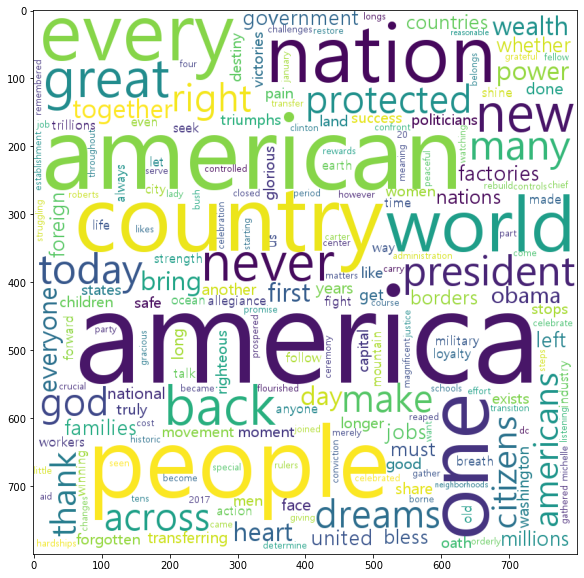

In [6]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
#트럼프 연설문을 워드 클라우드로 표현
# 폰트 경로, 워드클라우드의 가로, 세로 사이즈
wordcloud = WordCloud(
font_path = 'c:/windows/fonts/malgun.ttf',
width = 800,
height = 800,
background_color="white")
#단어별 출현횟수 저장
count = Counter(stopped_tokens2)
print(count)
wordcloud = wordcloud.generate_from_frequencies(count)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.show()